# Sentiment Analysis of Amazon Reviews Using Natural Language Processing



### Project Description:
    
This project aims to analyze customer sentiment in Amazon reviews by employing Natural Language Processing (NLP) techniques. The workflow begins with loading and preprocessing the review data, including tokenization, stop word removal, and lemmatization. Sentiment analysis is performed using NLTK's Sentiment Intensity Analyzer to generate sentiment scores for each review.

The processed data is then visualized to display the distribution of sentiment categories, providing insights into customer opinions. A Logistic Regression model is trained on TF-IDF features extracted from the processed reviews to predict sentiment labels (positive or negative). The model's performance is evaluated using classification metrics and a confusion matrix, offering a clear view of its accuracy and reliability.

Finally, the project concludes with predictions on example reviews and a word cloud visualization of frequently used terms, highlighting the most common sentiments expressed in the reviews. This end-to-end analysis provides valuable insights into customer satisfaction and product perception, aiding businesses in making informed decisions based on consumer feedback.

In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('amazon.csv')

# Check the first few rows
print(data.head())


                                                Text  label
0  This is  the best apps acording to a bunch of ...      1
1  This is a pretty good version of the game for ...      1
2  this is a really . there are a bunch of levels...      1
3  This is a silly game and can be frustrating, b...      1
4  This is a terrific game on any pad. Hrs of fun...      1


### Preprocess Text Data

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return ' '.join(processed_tokens)

# Apply preprocessing
data['processed_review'] = data['Text'].apply(preprocess_text)  



### Apply Sentiment Analysis

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data['sentiment'] = data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

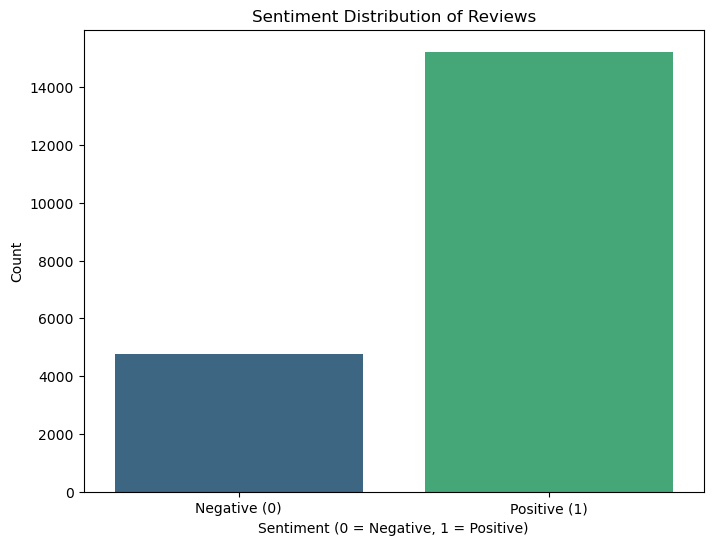

In [36]:
#Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.show()

### Prepare Data for Modeling

In [24]:
X = data['processed_review']
y = data['label']  # Assuming the label column is named 'label'

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



In [25]:
from sklearn.linear_model import LogisticRegression

# Step 5: Model Training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



LogisticRegression()

### Make Predictions

In [26]:
y_pred = lr_model.predict(X_test)

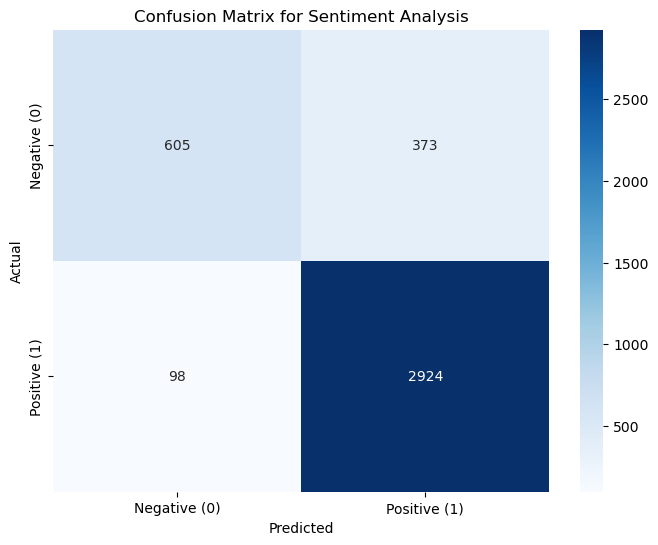

In [28]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative (0)', 'Positive (1)'], 
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix for Sentiment Analysis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Example Reviews for Prediction
example_reviews = ["I love this product!", "This is the worst purchase I've ever made."]

# Preprocess the example reviews
example_processed = [preprocess_text(review) for review in example_reviews]
example_tfidf = tfidf_vectorizer.transform(example_processed)

# Make predictions
predictions = lr_model.predict(example_tfidf)

# Display predictions
for review, pred in zip(example_reviews, predictions):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review} | Predicted Sentiment: {sentiment}")

Review: I love this product! | Predicted Sentiment: Positive
Review: This is the worst purchase I've ever made. | Predicted Sentiment: Negative


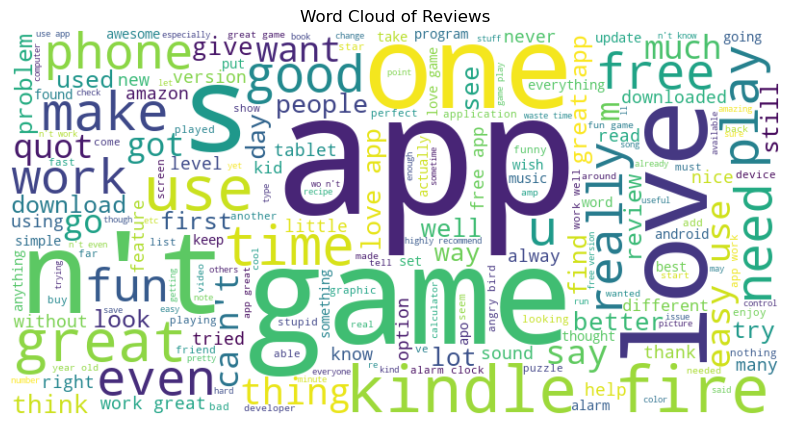

In [30]:
# Create Word Cloud
all_reviews = ' '.join(data['processed_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Reviews')
plt.show()